<a href="https://colab.research.google.com/github/ShravaniAnilPatil/Codes/blob/main/BI_project_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the CSV into a pandas DataFrame
df = pd.read_csv(filename)

# Display the first few rows
print("File uploaded successfully!")
df.head()



Saving yield_df.csv to yield_df (5).csv
File uploaded successfully!


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [86]:
df.isnull().sum()


,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Item'] = le.fit_transform(df['Item'])


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','hg/ha_yield']] = scaler.fit_transform(df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','hg/ha_yield']])


In [89]:
X = df[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['hg/ha_yield']


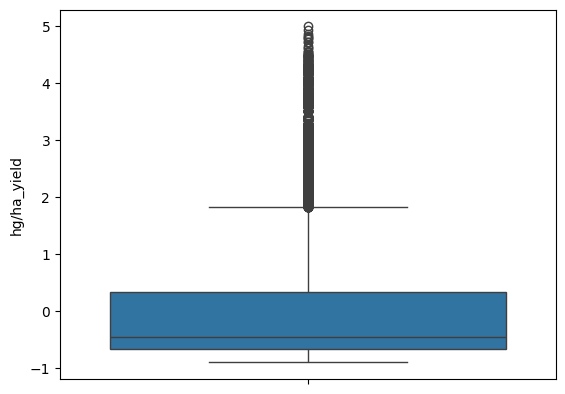

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y)  # Check for outliers
plt.show()


In [91]:
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

y_filtered = y[(y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR)]


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the features (optional, useful for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [94]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [95]:
y_pred = model.predict(X_test)


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 74199.97425781454
MSE: 11295990938.531816
R² Score: -11239459437.376183


In [97]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limiting depth to prevent overfitting
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

In [98]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


In [99]:
# Function to calculate evaluation metrics
import numpy as np
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"📊 {model_name} Performance:")
    print(f"  - MAE:  {mae:.2f}")
    print(f"  - MSE:  {mse:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    print(f"  - R² Score: {r2:.4f}\n")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")
evaluate_model(y_test,y_pred_xgb,"XGBoost")

📊 Linear Regression Performance:
  - MAE:  0.74
  - MSE:  0.92
  - RMSE: 0.96
  - R² Score: 0.0843

📊 Decision Tree Regression Performance:
  - MAE:  0.29
  - MSE:  0.23
  - RMSE: 0.48
  - R² Score: 0.7702

📊 Random Forest Regression Performance:
  - MAE:  0.04
  - MSE:  0.01
  - RMSE: 0.12
  - R² Score: 0.9857

📊 XGBoost Performance:
  - MAE:  0.12
  - MSE:  0.04
  - RMSE: 0.20
  - R² Score: 0.9606



In [100]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,0,1,1990,-0.476020,0.473294,-0.616366,-0.661069
1,1,0,3,1990,-0.122257,0.473294,-0.616366,-0.661069
2,2,0,4,1990,-0.632338,0.473294,-0.616366,-0.661069
3,3,0,5,1990,-0.759852,0.473294,-0.616366,-0.661069
4,4,0,6,1990,-0.824592,0.473294,-0.616366,-0.661069


Classification

Accuracy: 1.0000
              precision    recall  f1-score   support

       Other       1.00      1.00      1.00      5649

    accuracy                           1.00      5649
   macro avg       1.00      1.00      1.00      5649
weighted avg       1.00      1.00      1.00      5649



  Item  hg/ha_yield        crop_yield_class
0    1    -0.476020  1_-0.47602001415812784
1    3    -0.122257  3_-0.12225670993404435
2    4    -0.632338   4_-0.6323378646970188
3    5    -0.759852   5_-0.7598522679265223
4    6    -0.824592   6_-0.8245923415683821
